In [82]:
# Level 1
# Task 1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch 

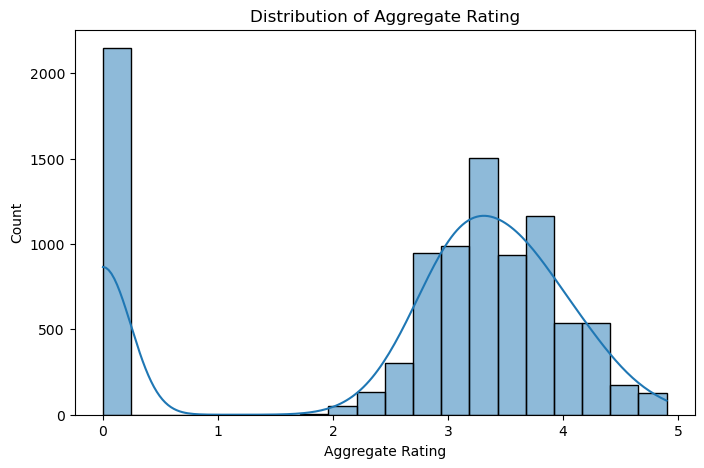


Class distribution:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: Int64


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "G:\\Dataset .csv"  # Ensure the correct file path
df = pd.read_csv(dataset_path)

# Display basic information
print("Dataset Info:")
df.info()
print("\nShape of the dataset:", df.shape)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values (example: filling with mean for numerical columns)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)  # Filling categorical missing values with 'Unknown'

# Convert data types if necessary
df = df.convert_dtypes()

# Analyze the distribution of the target variable ('Aggregate rating')
target_column = "Aggregate rating"
if target_column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[target_column], bins=20, kde=True)
    plt.title("Distribution of Aggregate Rating")
    plt.xlabel("Aggregate Rating")
    plt.ylabel("Count")
    plt.show()
    
    # Check for class imbalance
    print("\nClass distribution:")
    print(df[target_column].value_counts())
else:
    print("\nTarget column 'Aggregate rating' not found in dataset.")


In [86]:
# Level 1
# Task 2

In [88]:
# Descriptive Analysis
print("\nStatistical Measures for Numerical Columns:")
print(df.describe())

# Distribution of Categorical Variables
categorical_columns = ["Country Code", "City", "Cuisines"]
for col in categorical_columns:
    if col in df.columns:
        print(f"\nDistribution of {col}:")
        print(df[col].value_counts().head(10))

# Top Cuisines and Cities with Highest Number of Restaurants
if "Cuisines" in df.columns:
    print("\nTop 10 Cuisines with Most Restaurants:")
    print(df['Cuisines'].value_counts().head(10))

if "City" in df.columns:
    print("\nTop 10 Cities with Most Restaurants:")
    print(df['City'].value_counts().head(10))



Statistical Measures for Numerical Columns:
        Restaurant ID  Country Code   Longitude   Latitude  \
count          9551.0        9551.0      9551.0     9551.0   
mean   9051128.349178     18.365616   64.126574  25.854381   
std    8791521.282104     56.750546   41.467058  11.007935   
min              53.0           1.0 -157.948486 -41.330428   
25%          301962.5           1.0   77.081343  28.478713   
50%         6004089.0           1.0   77.191964  28.570469   
75%        18352291.5           1.0   77.282006  28.642758   
max        18500652.0         216.0  174.832089   55.97698   

       Average Cost for two  Price range  Aggregate rating       Votes  
count                9551.0       9551.0            9551.0      9551.0  
mean            1199.210763     1.804837           2.66637  156.909748  
std            16121.183073     0.905609          1.516378  430.169145  
min                     0.0          1.0               0.0         0.0  
25%                   250.0    

In [90]:
# Level 1
# Task 3

Map of restaurant locations has been saved as 'restaurant_map.html'.


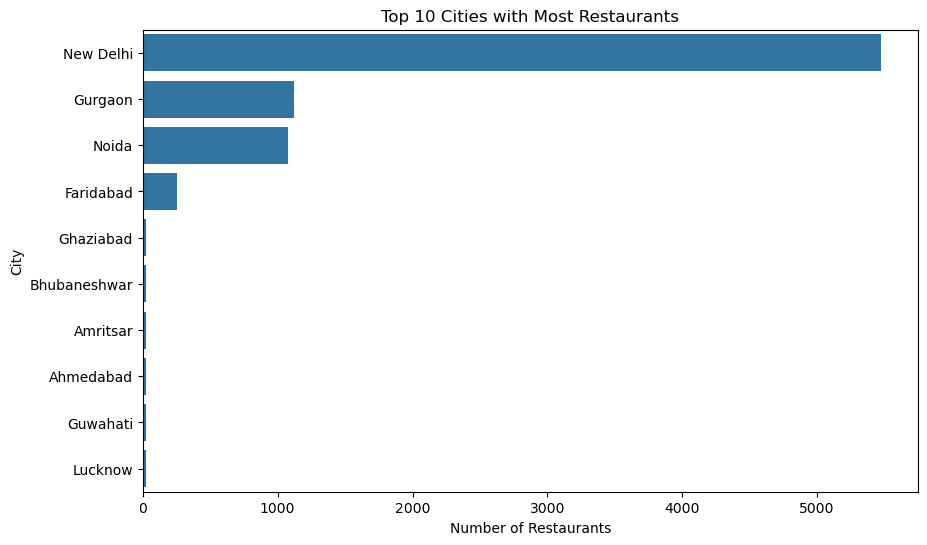

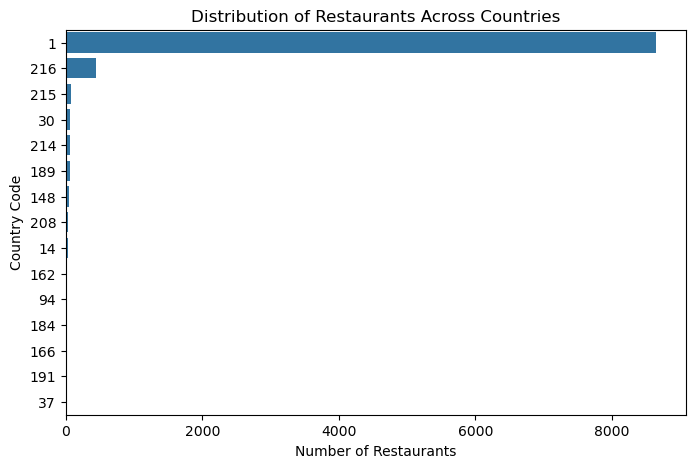

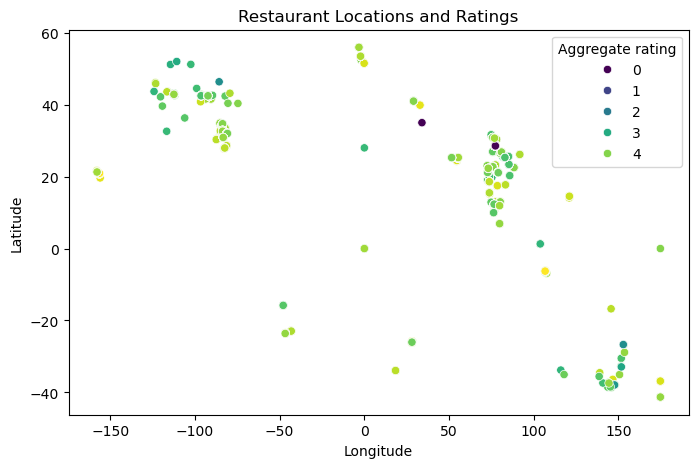

In [92]:
import folium

# Visualize restaurant locations on a map if latitude and longitude are available
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    restaurant_map = folium.Map(location=map_center, zoom_start=5)

    for idx, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Restaurant Name']} - Rating: {row['Aggregate rating']}"
        ).add_to(restaurant_map)

    # Save the map as an HTML file
    restaurant_map.save("restaurant_map.html")
    print("Map of restaurant locations has been saved as 'restaurant_map.html'.")

# Distribution of restaurants across different cities or countries
if 'City' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10])
    plt.title("Top 10 Cities with Most Restaurants")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("City")
    plt.show()

if 'Country Code' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y='Country Code', data=df, order=df['Country Code'].value_counts().index)
    plt.title("Distribution of Restaurants Across Countries")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("Country Code")
    plt.show()

# Convert Latitude, Longitude, and Aggregate Rating to standard float type
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce').astype(float)
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce').astype(float)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce').astype(float)



# Correlation between location and rating
if 'Aggregate rating' in df.columns and 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', data=df)
    plt.title("Restaurant Locations and Ratings")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


In [94]:
# Level 2 
# Task 1

In [96]:

# Percentage of restaurants offering table booking and online delivery
if 'Has Table booking' in df.columns and 'Has Online delivery' in df.columns:
    table_booking_percent = (df['Has Table booking'].eq('Yes').mean()) * 100
    online_delivery_percent = (df['Has Online delivery'].eq('Yes').mean()) * 100
    print(f"Percentage of restaurants with table booking: {table_booking_percent:.2f}%")
    print(f"Percentage of restaurants with online delivery: {online_delivery_percent:.2f}%")

# Average ratings comparison for restaurants with and without table booking
if 'Aggregate rating' in df.columns and 'Has Table booking' in df.columns:
    rating_comparison = df.groupby('Has Table booking')['Aggregate rating'].mean()
    print("\nAverage ratings comparison:")
    print(rating_comparison)

# Availability of online delivery across different price ranges
if 'Price range' in df.columns and 'Has Online delivery' in df.columns:
    delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
    print("\nOnline delivery availability by price range:")
    print(delivery_by_price)


Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%

Average ratings comparison:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

Online delivery availability by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


In [98]:
# Level 2 
# Task 2

In [100]:

# Determine the most common price range
if 'Price range' in df.columns:
    most_common_price_range = df['Price range'].mode()[0]
    print(f"Most common price range: {most_common_price_range}")

# Calculate the average rating for each price range
if 'Price range' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
    print("\nAverage Rating by Price Range:")
    print(avg_rating_by_price)

# Identify the color representing the highest average rating
if 'Rating color' in df.columns and 'Aggregate rating' in df.columns:
    highest_avg_rating = avg_rating_by_price.idxmax()  # Price range with the highest average rating
    highest_rating_color = df[df['Price range'] == highest_avg_rating]['Rating color'].mode()[0]
    
    print(f"\nPrice range with the highest average rating: {highest_avg_rating}")
    print(f"Color representing the highest average rating: {highest_rating_color}")


Most common price range: 1

Average Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

Price range with the highest average rating: 4
Color representing the highest average rating: Yellow


In [102]:
# Level 2
# Task 3

In [104]:

# Feature 1: Length of restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Feature 2: Length of address
df['Address Length'] = df['Address'].apply(len)

# Feature 3: Encode 'Has Table Booking' (Yes = 1, No = 0)
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature 4: Encode 'Has Online Delivery' (Yes = 1, No = 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the updated dataframe with new features
print(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length','Has Table Booking','Has Online Delivery']].head())


          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  \
0  Third Floor, Century City Mall, Kalayaan Avenu...              71   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64   

   Has Table Booking  Has Online Delivery  
0                  1                    0  
1                  1                    0  
2                  1                    0  
3                  0                    0  
4                  1        

In [106]:
# Level 3
# Task 1

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature Engineering: Selecting relevant features and target variable
features = ['Price range', 'Has Table Booking', 'Has Online Delivery', 'Votes', 'Restaurant Name Length']
target = 'Aggregate rating'

# Clean data by filling or dropping missing values
df = df[features + [target]].dropna()

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Initialization
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Model Training and Evaluation
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R² Score": r2
    }

# Display Results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                        MSE       MAE  R² Score
Linear Regression  1.683384  1.076175  0.256056
Decision Tree      0.244051  0.322683  0.892146
Random Forest      0.144928  0.250860  0.935952


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Feature Engineering: Selecting relevant features and target variable
features = ['Price range', 'Has Table Booking', 'Has Online Delivery', 'Votes', 'Restaurant Name Length']
target = 'Aggregate rating'

# Clean data by filling or dropping missing values
df = df[features + [target]].dropna()

# Split data into features (X) and target (y)
X = df[features]
y = df[target]


Model Performance Comparison:
                        MSE       MAE  R² Score
Linear Regression  1.683384  1.076175  0.256056
Decision Tree      0.244051  0.322683  0.892146
Random Forest      0.144928  0.250860  0.935952


In [112]:
# Level 3
# Task 2

In [114]:
import pandas as pd
df = pd.read_csv("G:\\Dataset .csv")
# Identify the relationship between cuisine and ratings
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()
print("Average Rating by Cuisine:")
print(cuisine_ratings)

# Identify the most popular cuisines based on total votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Popular Cuisines by Votes:")
print(popular_cuisines)

# Determine cuisines that receive the highest average ratings
top_rated_cuisines = cuisine_ratings.sort_values(ascending=False).head(10)
print("\nTop 10 Cuisines with Highest Average Ratings:")
print(top_rated_cuisines)

Average Rating by Cuisine:
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64

Top 10 Most Popular Cuisines by Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian         

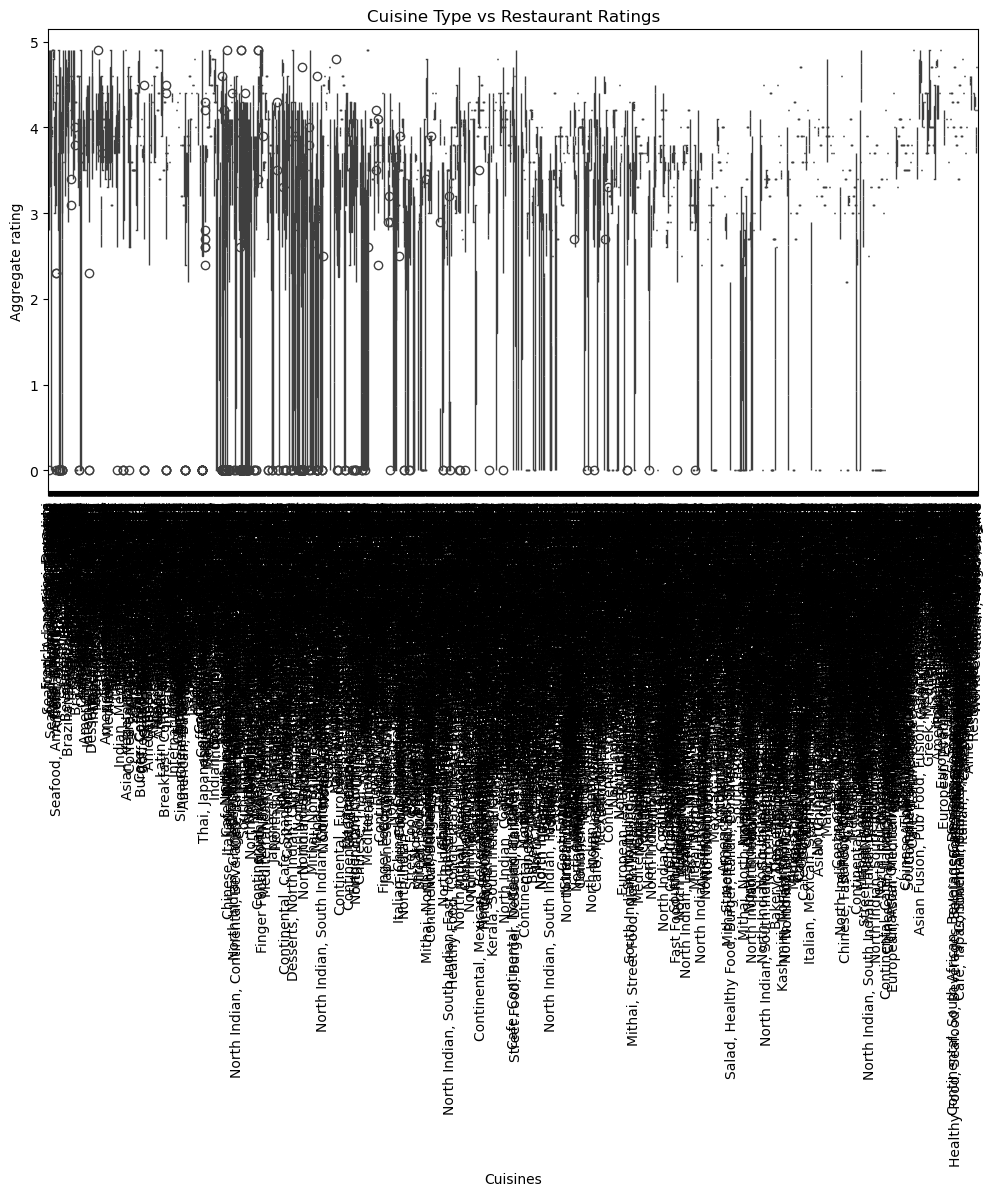

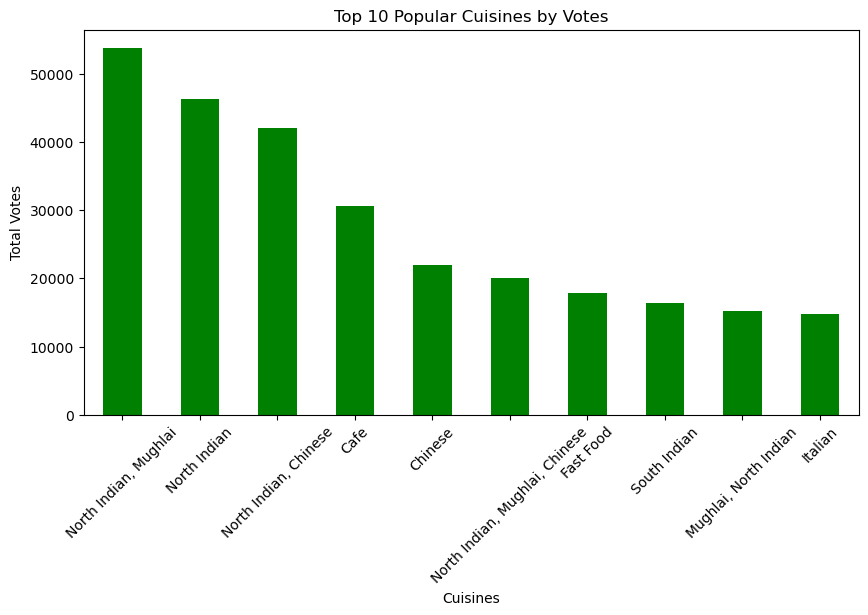

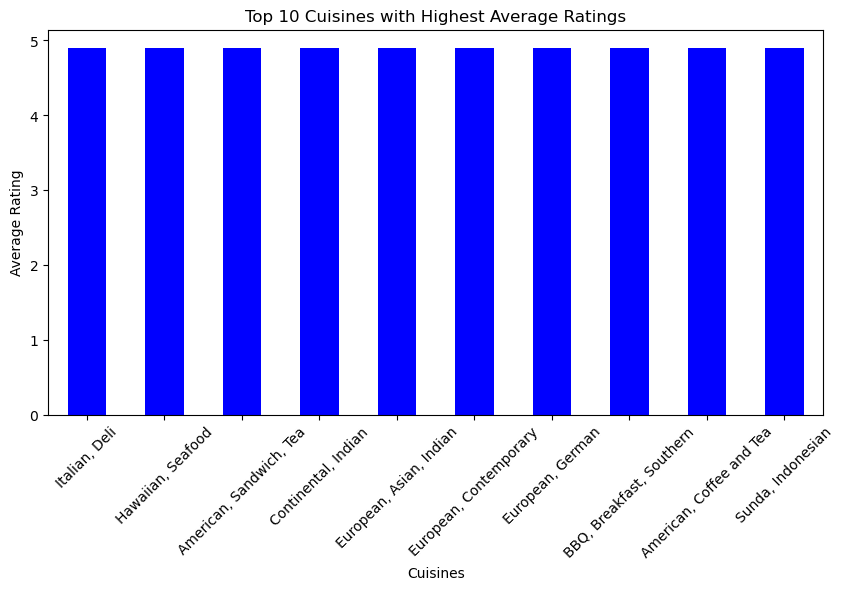

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your_file.csv' with actual file path)
df = pd.read_csv( "G:\\Dataset .csv" )

# Analyze the relationship between cuisine type and ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title("Cuisine Type vs Restaurant Ratings")
plt.show()

# Identify the most popular cuisines based on the number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
popular_cuisines.plot(kind='bar', color='green')
plt.title("Top 10 Popular Cuisines by Votes")
plt.xlabel("Cuisines")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()

# Determine cuisines that tend to receive higher ratings
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
average_ratings.plot(kind='bar', color='blue')
plt.title("Top 10 Cuisines with Highest Average Ratings")
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [118]:
# Level 3
# Task 3

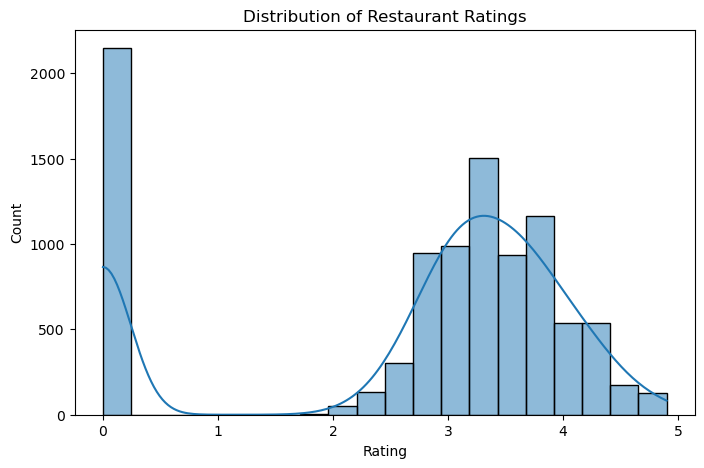

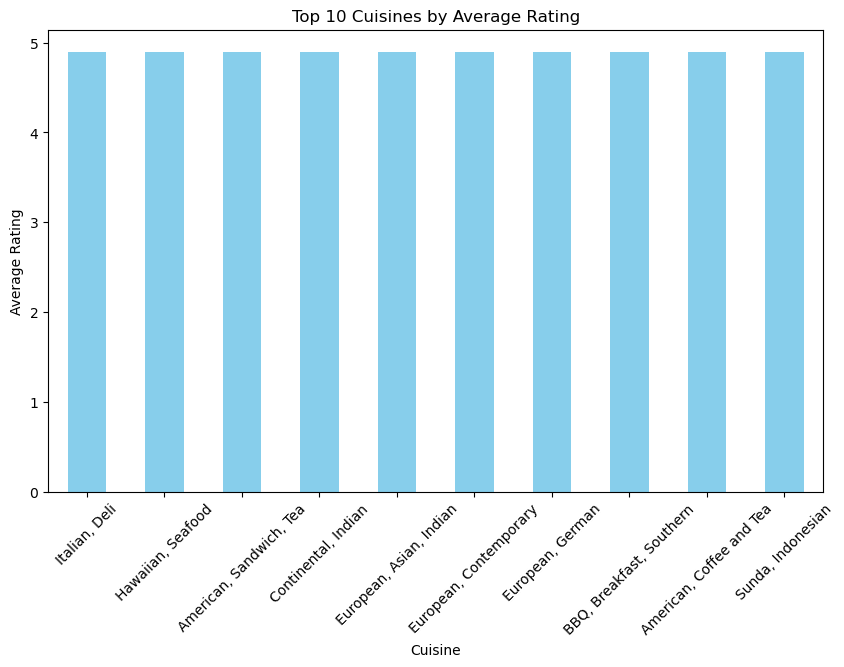

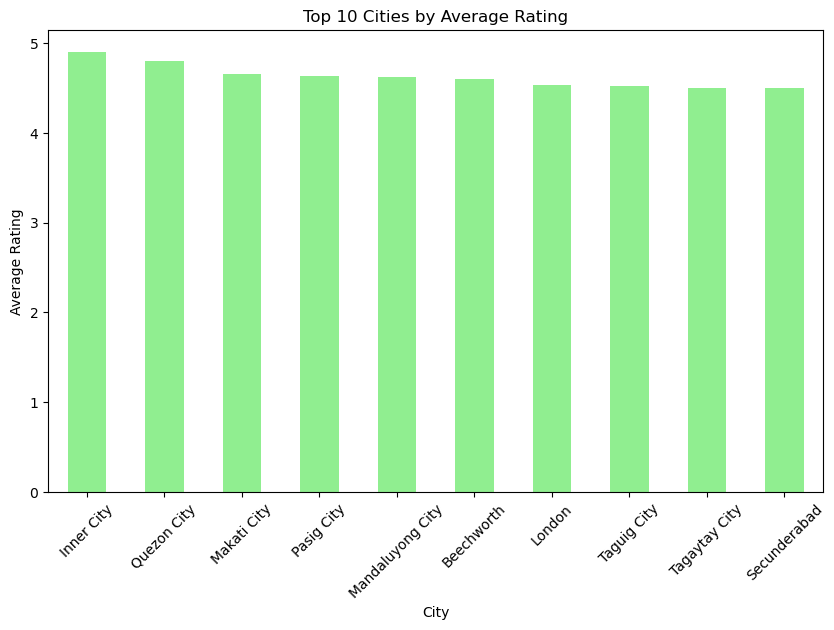

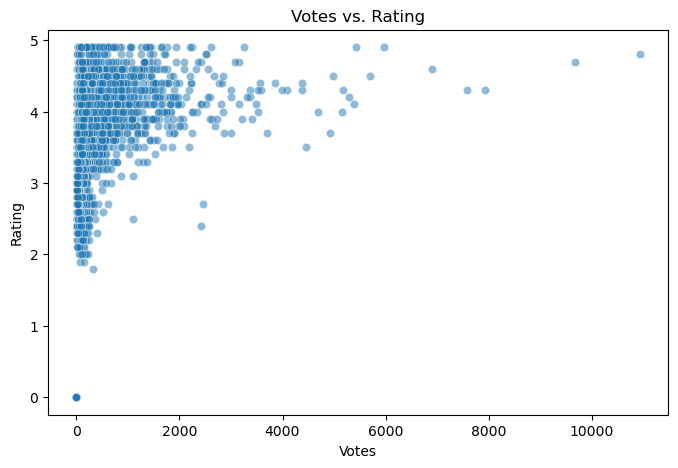

In [120]:

# Distribution of ratings - Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Bar plot for average rating by cuisine
plt.figure(figsize=(10, 6))
avg_rating_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
avg_rating_cuisine.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Bar plot for average rating by city
plt.figure(figsize=(10, 6))
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
avg_rating_city.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Relationship between votes and ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()